# **House (TV Series)**
***Huseyin Polat, 437969***




[**House** (also called ***House, M.D.***)](https://en.wikipedia.org/wiki/House_(TV_series)#Episodes) is an American medical drama television series that originally ran on the Fox network for eight seasons, from November 16, 2004, to May 21, 2012. Its main character, ***Dr. Gregory House (Hugh Laurie)***, is an unconventional, misanthropic medical genius who, despite his dependence on pain medication, leads a team of diagnosticians at the fictional Princeton–Plainsboro Teaching Hospital (PPTH) in New Jersey. The series' premise originated with Paul Attanasio, while David Shore, who is credited as creator, was primarily responsible for conceiving the title character.

![House](House-MD.png "Source: https://clesportstalk.com/im-watching-house-m-d-loving-it-heres-why/")

Source: [clesportstalk.com](https://clesportstalk.com/im-watching-house-m-d-loving-it-heres-why/")

## Analysis of Viewership

In [170]:
# Load libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.mode.copy_on_write = True

Link to source data: [Wikipedia](https://en.wikipedia.org/wiki/List_of_House_episodes)

In [171]:
# Read source file for viewers
viewers = pd.read_csv("House_US_viewers_per_episode_millions - house.csv")
# Save avg number of viewers seperately
viewers_avg = viewers[["Season","Average"]]
# Drop average number of viewers
viewers.drop("Average", axis=1, inplace=True)
# Check dataset viewers
viewers.head(10)

,Season,Episode 1,Episode 2,Episode 3,Episode 4,Episode 5,Episode 6,Episode 7,Episode 8,Episode 9,...,Episode 15,Episode 16,Episode 17,Episode 18,Episode 19,Episode 20,Episode 21,Episode 22,Episode 23,Episode 24
0,Season 1,7.05,6.09,6.33,6.74,6.91,6.73,6.91,12.37,12.75,...,17.34,18.28,15.04,17.48,17.14,18.80,17.68,19.52,–,NaN
1,Season 2,15.91,13.64,13.37,12.18,14.15,12.95,14.72,14.91,14.52,...,21.44,22.71,21.2,22.64,24.52,22.71,17.16,24.29,22.38,25.47
2,Season 3,19.55,15.74,13.67,14.52,14.18,16.11,14.60,15.20,17.30,...,24.40,20.80,20.35,21.57,22.41,20.81,21.13,21.36,21.19,17.23
3,Season 4,14.52,17.44,18.03,18.10,17.29,18.17,16.95,16.88,16.96,...,14.84,16.16,–,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Season 5,14.77,12.37,12.97,13.26,13.08,13.49,13.06,13.26,12.87,...,14.19,14.85,12.38,13.13,12.51,13.29,12.19,11.69,12.04,12.74
5,Season 6,15.76,15.76,14.44,13.74,13.50,11.65,13.31,12.67,11.95,...,12.81,11.37,10.8,10.81,10.85,9.98,9.29,11.06,–,NaN
6,Season 7,10.54,10.18,10.78,9.69,9.65,9.63,10.77,9.24,10.52,...,11.08,10.41,9.49,8.93,8.80,8.57,7.94,8.92,9.11,–
7,Season 8,9.78,6.85,8.34,6.65,7.55,6.63,7.46,7.41,8.76,...,6.67,6.01,5.61,6.49,6.45,6.09,6.45,8.72,–,NaN


In [172]:
# Convert dataset to long format
viewers_long = pd.melt(viewers, id_vars=["Season"], var_name="Episode", value_name="Viewers")
# Remove text from Season column
viewers_long['Season'] = viewers_long['Season'].str.extract('(\d+)')
# Remove text from Episode column and save as integer
viewers_long['Episode'] = viewers_long['Episode'].str.extract('(\d+)').astype('int')
# Convert viewers to numbers
viewers_long['Viewers'] = pd.to_numeric(viewers_long['Viewers'], errors='coerce')
# Remove missing records
viewers_long.dropna(inplace = True)
# Check dataset
viewers_long.head()

,Season,Episode,Viewers
0,1,1,7.05
1,2,1,15.91
2,3,1,19.55
3,4,1,14.52
4,5,1,14.77


### Descriptive statistics of each season

In [173]:
viewerst_transposed = viewers_long.pivot_table(index='Episode', columns='Season', values='Viewers')
viewerst_transposed.describe().T

,count,mean,std,min,25%,50%,75%,max
Season,,,,,,,,
1,22.0,13.215455,4.893206,6.09,6.9450,15.005,17.3375,19.52
2,24.0,18.411667,4.392241,12.18,14.4350,18.180,22.4450,25.47
3,24.0,19.161667,4.209591,11.77,15.6050,19.950,21.4125,27.34
4,16.0,17.991250,3.946490,13.26,15.8300,17.125,18.1175,29.04
5,24.0,13.345000,1.066441,11.69,12.5100,13.105,14.0850,15.69
6,22.0,12.565000,1.735645,9.29,11.1375,12.740,13.5750,15.76
7,23.0,9.926522,0.997048,7.94,9.1750,9.860,10.5300,12.33
8,22.0,7.178182,1.084886,5.61,6.4600,6.965,7.5275,9.78


- The show has ***8 seasons***.
- ***Season 3*** shows the ***maximum average number of viewers*** with a mean of approximately ***19.16 million viewers***.
- ***Season 4*** has the ***highest maximum number of viewers*** with a maximum of ***29.04 million viewers***.
- ***Season 8*** has the ***lowest average number of viewers*** with a mean of approximately ***7.18 million viewers***.


### Viewers trend for each season

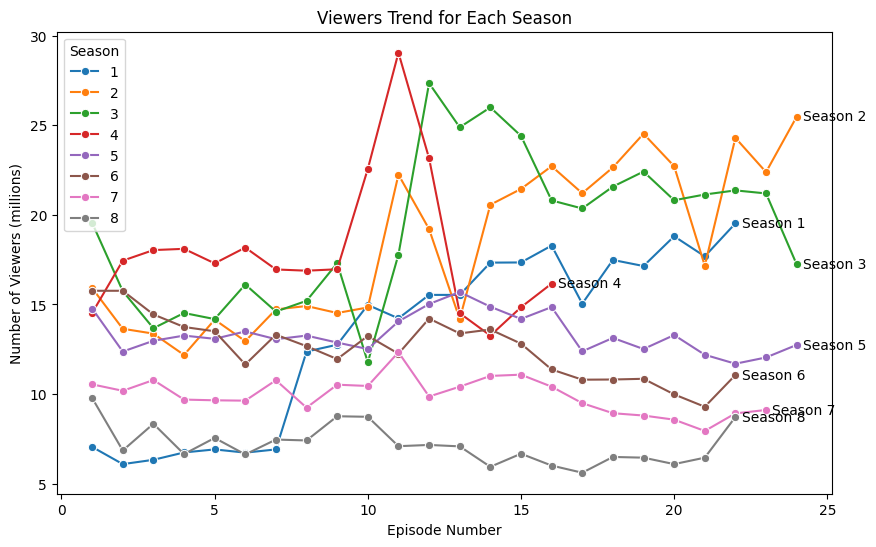

In [174]:
# Assuming 'viewers_long' is your DataFrame
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
sns.lineplot(data=viewers_long, x='Episode', y='Viewers', hue='Season', marker='o')

plt.title('Viewers Trend for Each Season')  # Adding a title
plt.xlabel('Episode Number')  # Label for the X-axis
plt.ylabel('Number of Viewers (millions)')  # Label for the Y-axis
plt.legend(title='Season')  # Adding a legend with a title

# Annotating text for each line indicating the season
for season in viewers_long['Season'].unique():
    last_episode = viewers_long.loc[viewers_long['Season'] == season, 'Episode'].max()
    last_viewers = viewers_long.loc[(viewers_long['Season'] == season) & (viewers_long['Episode'] == last_episode), 'Viewers'].iloc[0]
    plt.text(last_episode+0.2, last_viewers, f'Season {season}', horizontalalignment='left', verticalalignment='center')

plt.show()


**While the initial three seasons exhibit notable hype and fluctuations, the subsequent five seasons demonstrate a stable trend with minimal fluctuations in viewership.**

### Changes in average number of viewers across seasons

In [175]:
# Check dataset averages
viewers_avg.head(10)

,Season,Average
0,Season 1,13.22
1,Season 2,18.41
2,Season 3,19.16
3,Season 4,17.99
4,Season 5,13.35
5,Season 6,12.57
6,Season 7,9.93
7,Season 8,7.18


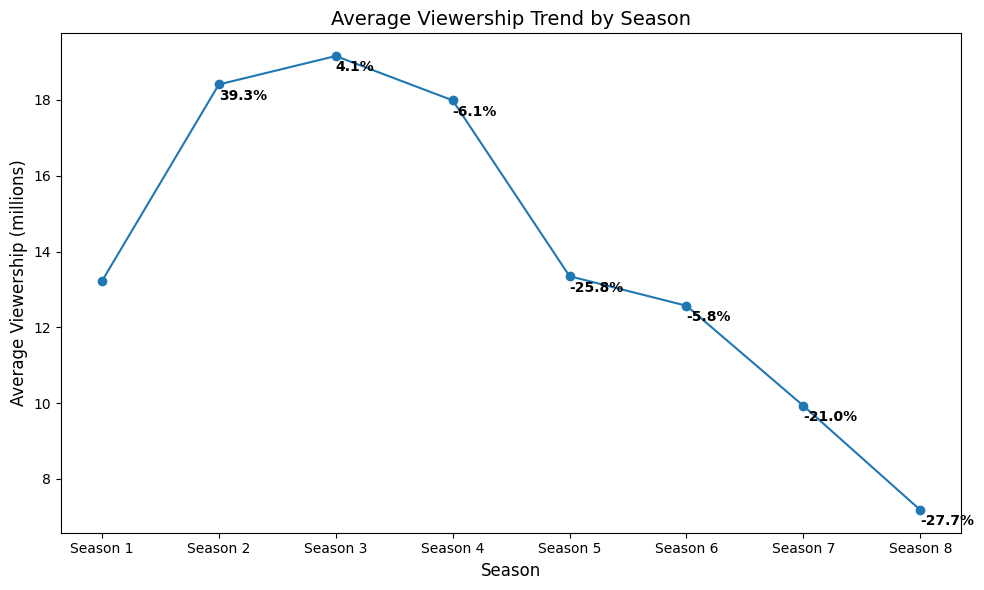

In [178]:

# Plotting the average viewers for each season
plt.figure(figsize=(10, 6))
plt.plot(viewers_avg['Season'], viewers_avg['Average'], marker='o', linestyle='-')

# Annotating the percentage change for each season
for i, (season, average) in enumerate(zip(viewers_avg['Season'], viewers_avg['Average'])):
    if i > 0:
        percent_change = ((average - prev_average) / prev_average) * 100
        viewers_avg.loc[i,"percent_change"] = percent_change
        plt.text(season, average-0.3, f'{percent_change:.1f}%', horizontalalignment='left', verticalalignment='center', fontsize=10, fontweight='bold')
    prev_average = average

# Adding labels and title
plt.title('Average Viewership Trend by Season', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Viewership (millions)', fontsize=12)
plt.grid(False)  # Remove gridlines
plt.tight_layout()  # Adjust layout to prevent overlapping labels

plt.show()

**The above trend highlights the remarkable success of the show during its initial three seasons. However, subsequent seasons witnessed a consistent decline in viewership, up to the last season, which showed no signs of improvement in the average number of viewers.**


In [177]:
# Calculate the maximum percent change
max_percent_change = viewers_avg['percent_change'].max()

# Find the season(s) with the maximum percent change
max_season = viewers_avg.loc[viewers_avg['percent_change'] == max_percent_change, 'Season'].tolist()

# Calculate the minimum percent change
min_percent_change = viewers_avg['percent_change'].min()

# Find the season(s) with the minimum percent change
min_season = viewers_avg.loc[viewers_avg['percent_change'] == min_percent_change, 'Season'].tolist()

# Print the statement indicating the biggest increase observed and between which episodes
print(f"The biggest increase observed is {max_percent_change:.1f}% between {max_season[0][:-1] + str(int(max_season[0][-1])-1)} and {max_season[0]}.")

# Print the statement indicating the biggest decrease observed and between which episodes
print(f"The biggest decrease observed is {min_percent_change:.1f}% between {min_season[0][:-1] + str(int(min_season[0][-1])-1)} and {min_season[0]}.")

The biggest increase observed is 39.3% between Season 1 and Season 2.
The biggest decrease observed is -27.7% between Season 7 and Season 8.
